A new football club named ‘Brussels United FC’ has just been inaugurated. This club does not have a team yet. The team is looking to hire players for their roster. Management wants to make such decisions using data-based approach. During a recent hiring drive, you were selected for the Data Science team as a junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the players, the clubs they are currently playing for and various performance measures. There is a limited budget for hiring players. The team needs 20 possible players to choose from. You have been requested to formulate a report in order to help the management make a decision regarding potential players.

Data: The data contains details for over 18,000 players playing in various football clubs in Europe. It contains information on age, skill rating, wages and player value, etc. The files provided are as follows: fifa.csv – data file. fifa_ variable_information.csv - information on individual variables.

# Data Pre-processing:

# 1.Import the necessary libraries and read the data.

In [1]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#reading csv file 

data_fifa=pd.read_csv('fifa.csv')
data_fifa

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,238813,J. Lundstram,19,https://cdn.sofifa.org/players/4/19/238813.png,England,https://cdn.sofifa.org/flags/14.png,47,65,Crewe Alexandra,https://cdn.sofifa.org/teams/2/light/121.png,...,45.0,40.0,48.0,47.0,10.0,13.0,7.0,8.0,9.0,€143K
18203,243165,N. Christoffersson,19,https://cdn.sofifa.org/players/4/19/243165.png,Sweden,https://cdn.sofifa.org/flags/46.png,47,63,Trelleborgs FF,https://cdn.sofifa.org/teams/2/light/703.png,...,42.0,22.0,15.0,19.0,10.0,9.0,9.0,5.0,12.0,€113K
18204,241638,B. Worman,16,https://cdn.sofifa.org/players/4/19/241638.png,England,https://cdn.sofifa.org/flags/14.png,47,67,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,41.0,32.0,13.0,11.0,6.0,5.0,10.0,6.0,13.0,€165K
18205,246268,D. Walker-Rice,17,https://cdn.sofifa.org/players/4/19/246268.png,England,https://cdn.sofifa.org/flags/14.png,47,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,46.0,20.0,25.0,27.0,14.0,6.0,14.0,8.0,9.0,€143K


In [3]:
fifa_var=pd.read_csv('fifa_ variable_information.csv')
fifa_var.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


# 2.Drop any columns that you deem unnecessary for analysis.

In [4]:
# checking null value where data is null
data_fifa.isna().sum()/len(data_fifa)*100

ID                           0.000000
Name                         0.000000
Age                          0.000000
Photo                        0.000000
Nationality                  0.000000
Flag                         0.000000
Overall                      0.000000
Potential                    0.000000
Club                         1.323667
Club Logo                    0.000000
Value                        0.000000
Wage                         0.000000
Preferred Foot               0.263635
International Reputation     0.263635
Weak Foot                    0.263635
Skill Moves                  0.263635
Work Rate                    0.263635
Body Type                    0.263635
Position                     0.329544
Jersey Number                0.329544
Joined                       8.529686
Loaned From                 93.057615
Contract Valid Until         1.587302
Height                       0.263635
Weight                       0.263635
Crossing                     0.263635
Finishing   

# 3. The following columns need to be converted for further analysis:

Value' Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix. 'Wage' Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix. 'Joined' Year as a string, in some cases complete date as string Convert to int with only year 'Contract Valid Until' Date as a string Convert to datetime type 'Height' In inches with a quotation mark Convert to Float with decimal points 'Weight' Contains the suffix lbs Remove the suffix and convert to float 'Release Clause' Amount with Euro symbol as prefix and suffix ‘K’ or ‘M’ indicating thousands and millions respectively. Convert to Float after getting rid of currency symbol and suffix.

(You might encounter Nan values in the above columns. Pandas treats Nan values as float. Please keep that in mind when making the conversions.)

In [5]:
data_fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Preferred Foot            18159 non-null  object 
 13  International Reputation  18159 non-null  float64
 14  Weak F

In [6]:
#get rid the value suffix and prefix has to change and covert float as a data type

In [7]:
data_fifa['Value'].replace({'€' :' ','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
data_fifa['Value']=data_fifa['Value'].map(eval)
data_fifa['Value']

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [8]:
df_fifa=data_fifa['Value'].astype(float)

In [9]:
df_fifa

0        110500000.0
1         77000000.0
2        118500000.0
3         72000000.0
4        102000000.0
            ...     
18202        60000.0
18203        60000.0
18204        60000.0
18205        60000.0
18206        60000.0
Name: Value, Length: 18207, dtype: float64

In [10]:
data_fifa['Wage'].replace({'€' :' ','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
data_fifa['Wage']=data_fifa['Wage'].map(eval)
data_fifa['Wage']

0        565000
1        405000
2        290000
3        260000
4        355000
          ...  
18202      1000
18203      1000
18204      1000
18205      1000
18206      1000
Name: Wage, Length: 18207, dtype: int64

In [11]:
df_fifawa=data_fifa['Wage'].astype(float)

In [12]:
df_fifawa

0        565000.0
1        405000.0
2        290000.0
3        260000.0
4        355000.0
           ...   
18202      1000.0
18203      1000.0
18204      1000.0
18205      1000.0
18206      1000.0
Name: Wage, Length: 18207, dtype: float64

In [13]:
data_fifa['Joined'].isnull().sum()

1553

In [14]:
data_fifa['Joined'].fillna(data_fifa['Joined'].mode()[0],inplace=True)
data_fifa['Joined']=pd.DatetimeIndex(data_fifa['Joined']).year

In [15]:
data_fifa['Joined'].dtype

dtype('int64')

In [16]:
import datetime

In [17]:
data_fifa['Contract Valid Until']=pd.to_datetime(data_fifa['Contract Valid Until'])
data_fifa['Contract Valid Until']

0       2021-01-01
1       2022-01-01
2       2022-01-01
3       2020-01-01
4       2023-01-01
           ...    
18202   2019-01-01
18203   2020-01-01
18204   2021-01-01
18205   2019-01-01
18206   2019-01-01
Name: Contract Valid Until, Length: 18207, dtype: datetime64[ns]

In [58]:
data_fifa['Height']=data_fifa['Height'].replace("[']",'.',regex=True).astype(float)
data_fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [60]:
data_fifa['Weight']=data_fifa['Weight'].replace("lbs",'',regex=True).astype(float)
data_fifa['Weight']


0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

# 4. Check for missing values and do a mean imputation where necessary.

In [61]:
data_fifa['Release Clause'].isnull().sum()

0

In [62]:
df_fifa['Release Clause']=data_fifa['Release Clause'].dropna()
df_fifa['Release Clause']


0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [22]:
mean=df_fifa.replace({'€':'','K':'*10**3','M':'*10**6'},regex=True).map(eval).mean()
mean

4585060.986600974

In [23]:
data_fifa['Release Clause'].fillna('4585060.986600974',inplace=True)
data_fifa['Release Clause'].isnull().sum()

0

In [24]:
data_fifa['Release Clause'].replace({'€':'','K':'*10**3','M':'*10**6'},regex=True,inplace=True)
data_fifa['Release Clause']=data_fifa['Release Clause'].map(eval)
data_fifa['Release Clause']

0        226500000.0
1        127100000.0
2        228100000.0
3        138600000.0
4        196400000.0
            ...     
18202       143000.0
18203       113000.0
18204       165000.0
18205       143000.0
18206       165000.0
Name: Release Clause, Length: 18207, dtype: float64

In [43]:
 data_fifa['Weight'].isnull().sum()

48

In [64]:
mean=data_fifa['Weight'].mean()
mean

165.97912880665234

In [65]:
#the null value fill with the mean
data_fifa['Weight'].fillna(mean,inplace=True)
df_fifaw

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight, Length: 18207, dtype: float64

In [66]:
data_fifa['Weight'].isnull().sum()

0

In [67]:
#checking the null of height
mean_h=data_fifa['Height'].mean()
mean_h

5.797367145768057

In [69]:
#null  value imputaion with the mean
data_fifa['Height'].fillna(mean_h,inplace=True)
data_fifa['Height']

0        5.70
1        6.20
2        5.90
3        6.40
4        5.11
         ... 
18202    5.90
18203    6.30
18204    5.80
18205    5.10
18206    5.10
Name: Height, Length: 18207, dtype: float64

In [31]:
#replacing with mode
data_fifa['Contract Valid Until'].fillna(data_fifa['Contract Valid Until'].mode()[0],inplace=True)
data_fifa['Contract Valid Until'].isnull().sum()

0

In [32]:
#null value checking 
data_fifa['International Reputation'].isnull().sum()

48

In [33]:
#replacing with mean()

data_fifa['International Reputation'].fillna(data_fifa['International Reputation'].mean(),inplace=True)
data_fifa['International Reputation'].isnull().sum()

0

# Exploratory Analysis:

# 1. Plot the distribution of Overall rating for all players.

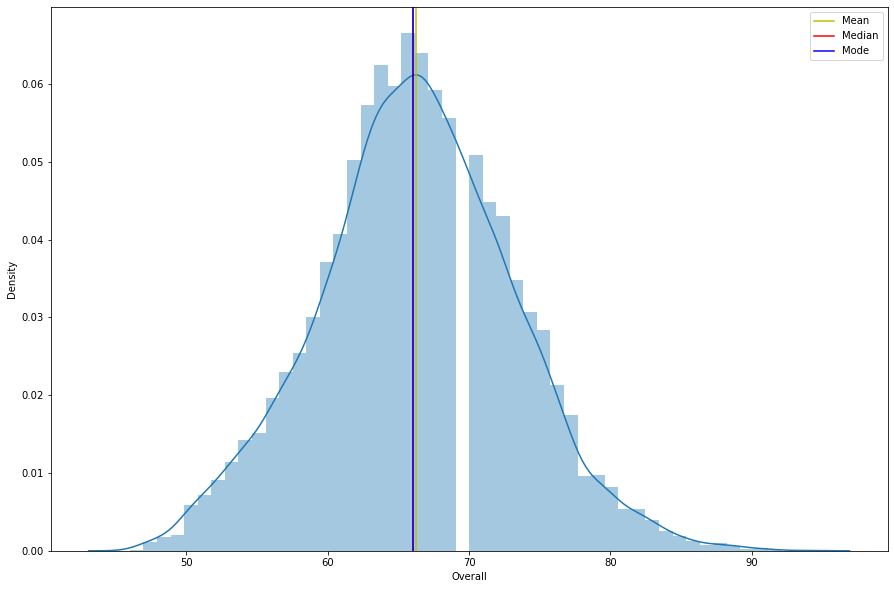

checking Skewness:  0.06718492227833812
checking Peakedness:  0.09656866702634614


In [34]:
#make a pairplot checking overall column mean median mode seen with plot .
plt.figure(figsize=(15,10))
sns.distplot(data_fifa['Overall'])
plt.axvline(x=data_fifa['Overall'].mean(),color='y',label='Mean')
plt.axvline(x=data_fifa['Overall'].median(),color='r',label='Median')
plt.axvline(x=data_fifa['Overall'].mode()[0],color='b',label='Mode')
plt.legend()
plt.show()
print('checking Skewness: ',data_fifa['Overall'].skew())
print('checking Peakedness: ',data_fifa['Overall'].kurt())

# 2. Generate pair plots for the following variables: Overall, Value, Wage, International Reputation, Height, Weight, Release Clause

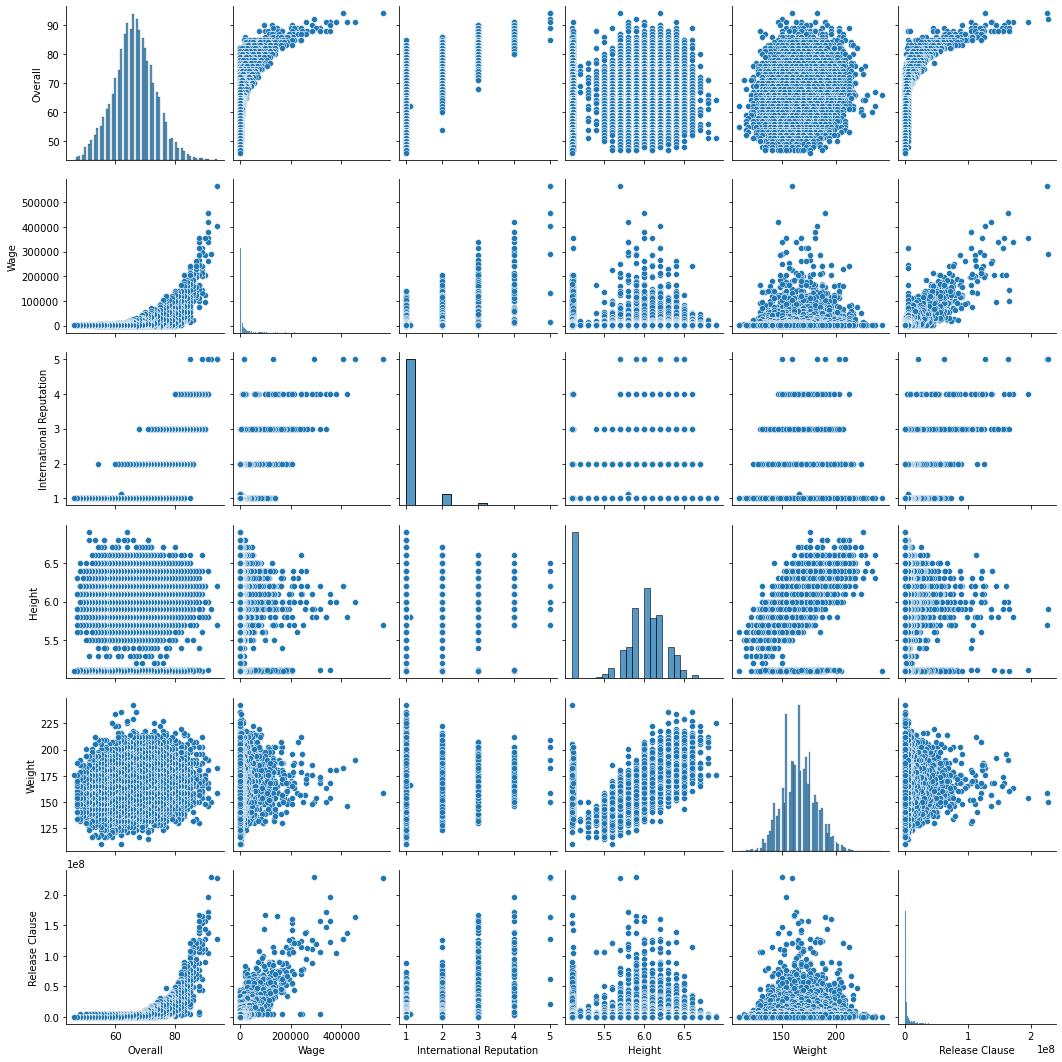

In [70]:
sns.pairplot(data_fifa,vars=('Overall','Wage','International Reputation','Height','Weight','Release Clause'))
plt.show()

In [71]:
data_fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0


# 3. Generate a table containing the top 20 players ranked by Overall score and whose contract expires in 2020.

In [93]:
# We are concerned only with the year of 'Contract Valid Until' field, so we will convert it to only year:
data_fifa['Contract Valid Until'] = pd.DatetimeIndex(data_fifa['Contract Valid Until']).year

In [95]:
data_fifa['Contract Valid Until'].head()

0    2021
1    2022
2    2022
3    2020
4    2023
Name: Contract Valid Until, dtype: int64

In [96]:
# Some players dont have 'Contract valid until', so we assume that they are currently not in any club and can be hired,
# so we fill their NaN with 2020.
data_fifa['Contract Valid Until'].fillna(2020,inplace=True)

In [98]:
data_fifa['Contract Valid Until']=data_fifa['Contract Valid Until'].astype(int)

In [100]:
data_fifa['Contract Valid Until'].isnull().sum()

0

In [102]:
top20_avail_palyer=data_fifa[data_fifa['Contract Valid Until']==2020].sort_values(by='Overall',ascending=False).head(20)
top20_avail_palyer

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
21,179813,E. Cavani,31,https://cdn.sofifa.org/players/4/19/179813.png,Uruguay,https://cdn.sofifa.org/flags/60.png,89,89,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,82.0,52.0,45.0,39.0,12.0,5.0,13.0,13.0,10.0,111000000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
31,190460,C. Eriksen,26,https://cdn.sofifa.org/players/4/19/190460.png,Denmark,https://cdn.sofifa.org/flags/13.png,88,91,Tottenham Hotspur,https://cdn.sofifa.org/teams/2/light/18.png,...,88.0,59.0,57.0,22.0,9.0,14.0,7.0,7.0,6.0,141500000.0
39,164240,Thiago Silva,33,https://cdn.sofifa.org/players/4/19/164240.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,81.0,88.0,89.0,85.0,9.0,12.0,5.0,9.0,10.0,44400000.0
50,175943,D. Mertens,31,https://cdn.sofifa.org/players/4/19/175943.png,Belgium,https://cdn.sofifa.org/flags/7.png,87,87,Napoli,https://cdn.sofifa.org/teams/2/light/48.png,...,81.0,25.0,40.0,40.0,7.0,10.0,8.0,10.0,4.0,76500000.0


# a) What would the average wage for this set of players be? b) What is the average age? c) Is there a correlation between the Overall rating and Value for these players?

In [109]:
top20_avail_palyer.to_excel('top20.xlsx')

In [110]:
avg_wage= top20_avail_palyer['Wage'].mean()
total_wage= top20_avail_palyer['Wage'].sum()
avg_age= top20_avail_palyer['Age'].mean()
avg_overall=top20_avail_palyer['Overall'].mean()
print('Average wage for selected 20 players would be: ','€' ,avg_wage)
print('Total wage for selected 20 players will be: ','€',total_wage)
print('Average Age for selected 20 players would be: ',avg_age,'years')
print('Average Overall rating for selected 20 players would be: ',avg_overall)

Average wage for selected 20 players would be:  € 205450.0
Total wage for selected 20 players will be:  € 4109000
Average Age for selected 20 players would be:  30.65 years
Average Overall rating for selected 20 players would be:  87.75


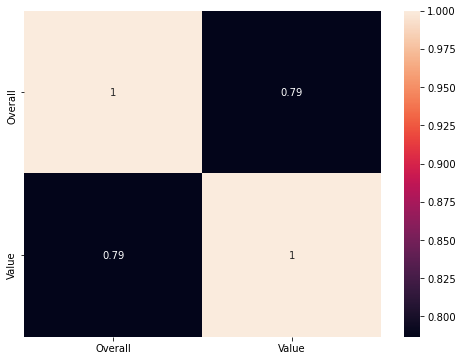

There is strong positive correlation between Overall rating and Value of the player


In [112]:
plt.figure(figsize=(8,6))
sns.heatmap(top20_avail_palyer[['Overall','Value']].corr(),annot=True)
plt.savefig('Overall_value_corr.jpeg')
plt.show()
print('There is strong positive correlation between Overall rating and Value of the player')

In [113]:
data_fifa[data_fifa['Position'].isnull()]

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5018,153160,R. Raldes,37,https://cdn.sofifa.org/players/4/19/153160.png,Bolivia,https://cdn.sofifa.org/flags/53.png,70,70,NaN,https://cdn.sofifa.org/flags/53.png,...,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0,4.585061e+06
6736,175393,J. Arce,33,https://cdn.sofifa.org/players/4/19/175393.png,Bolivia,https://cdn.sofifa.org/flags/53.png,68,68,NaN,https://cdn.sofifa.org/flags/53.png,...,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0,4.585061e+06
7922,195905,L. Gutiérrez,33,https://cdn.sofifa.org/players/4/19/195905.png,Bolivia,https://cdn.sofifa.org/flags/53.png,67,67,NaN,https://cdn.sofifa.org/flags/53.png,...,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0,4.585061e+06
9905,226044,R. Vargas,23,https://cdn.sofifa.org/players/4/19/226044.png,Bolivia,https://cdn.sofifa.org/flags/53.png,66,69,NaN,https://cdn.sofifa.org/flags/53.png,...,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0,4.585061e+06
10628,216751,D. Bejarano,26,https://cdn.sofifa.org/players/4/19/216751.png,Bolivia,https://cdn.sofifa.org/flags/53.png,65,66,NaN,https://cdn.sofifa.org/flags/53.png,...,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0,4.585061e+06
13236,177971,J. McNulty,33,https://cdn.sofifa.org/players/4/19/177971.png,Scotland,https://cdn.sofifa.org/flags/42.png,62,62,Rochdale,https://cdn.sofifa.org/teams/2/light/1955.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.585061e+06
13237,195380,J. Barrera,29,https://cdn.sofifa.org/players/4/19/195380.png,Nicaragua,https://cdn.sofifa.org/flags/86.png,62,62,Boyacá Chicó FC,https://cdn.sofifa.org/teams/2/light/112019.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.585061e+06
13238,139317,J. Stead,35,https://cdn.sofifa.org/players/4/19/139317.png,England,https://cdn.sofifa.org/flags/14.png,62,62,Notts County,https://cdn.sofifa.org/teams/2/light/1937.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.585061e+06
13239,240437,A. Semprini,20,https://cdn.sofifa.org/players/4/19/240437.png,Italy,https://cdn.sofifa.org/flags/27.png,62,72,Brescia,https://cdn.sofifa.org/teams/2/light/190.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.585061e+06
13240,209462,R. Bingham,24,https://cdn.sofifa.org/players/4/19/209462.png,England,https://cdn.sofifa.org/flags/14.png,62,66,Hamilton Academical FC,https://cdn.sofifa.org/teams/2/light/184.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.585061e+06


In [119]:
data_fifa[data_fifa['Contract Valid Until']==2020]


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18166,243621,N. Ayéva,16,https://cdn.sofifa.org/players/4/19/243621.png,Sweden,https://cdn.sofifa.org/flags/46.png,48,72,Örebro SK,https://cdn.sofifa.org/teams/2/light/705.png,...,44.0,14.0,19.0,16.0,10.0,9.0,8.0,7.0,6.0,158000.0
18179,246243,J. Williams,17,https://cdn.sofifa.org/players/4/19/246243.png,England,https://cdn.sofifa.org/flags/14.png,48,64,Northampton Town,https://cdn.sofifa.org/teams/2/light/1930.png,...,37.0,42.0,51.0,49.0,14.0,11.0,7.0,11.0,8.0,119000.0
18187,240158,C. Ehlich,19,https://cdn.sofifa.org/players/4/19/240158.png,Germany,https://cdn.sofifa.org/flags/21.png,47,59,SpVgg Unterhaching,https://cdn.sofifa.org/teams/2/light/172.png,...,47.0,40.0,42.0,42.0,13.0,12.0,11.0,15.0,12.0,66000.0
18189,240160,A. Kaltner,18,https://cdn.sofifa.org/players/4/19/240160.png,Germany,https://cdn.sofifa.org/flags/21.png,47,61,SpVgg Unterhaching,https://cdn.sofifa.org/teams/2/light/172.png,...,37.0,28.0,15.0,22.0,15.0,5.0,14.0,12.0,8.0,125000.0


In [120]:
data_fifa['Position'].isnull().sum()

60

# 4. Generate tables containing the top 5 players by Overall rating for each unique position.

a) Are there any players appearing in more than one Table. Please point out such players. b) What is the average wage one can expect to pay for the top 5 in every position?

# For Position variable, we are imputing this with 'ST' because 'ST' position is called side midfielder, they are on the left or right-hand side of central midfield.

In [121]:
data_fifa['Position'].fillna('ST')

0         RF
1         ST
2         LW
3         GK
4        RCM
        ... 
18202     CM
18203     ST
18204     ST
18205     RW
18206     CM
Name: Position, Length: 18207, dtype: object

In [122]:
data_fifa['Position'].isnull().sum()

60

In [123]:
data_fifa['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

In [125]:
top_goalkeepers=data_fifa[data_fifa['Position']=='GK'].sort_values(by='Overall',ascending=False).head(5)
top_goalkeepers

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,138600000.0
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,144500000.0
18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,123300000.0
19,192119,T. Courtois,26,https://cdn.sofifa.org/players/4/19/192119.png,Belgium,https://cdn.sofifa.org/flags/7.png,89,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,66.0,20.0,18.0,16.0,85.0,91.0,72.0,86.0,88.0,113700000.0
22,167495,M. Neuer,32,https://cdn.sofifa.org/players/4/19/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,89,89,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,70.0,17.0,10.0,11.0,90.0,86.0,91.0,87.0,87.0,62700000.0


In [126]:
print('Average wage: ','€',top_goalkeepers['Wage'].mean())

Average wage:  € 192800.0


In [127]:
top_defenders=data_fifa[(data_fifa['Position']=='CB')|(data_fifa['Position']=='LCB')|(data_fifa['Position']=='RCB')|(data_fifa['Position']=='LB')|(data_fifa['Position']=='RB')|(data_fifa['Position']=='LWB')|(data_fifa['Position']=='RWB')].sort_values(by='Overall',ascending=False).head(5)


In [128]:
top_defenders

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
34,178603,M. Hummels,29,https://cdn.sofifa.org/players/4/19/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,75900000.0
35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000.0


In [129]:
print('Average wage: ','€',top_defenders['Wage'].mean())

Average wage:  € 233000.0


In [130]:
top_midfielders=data_fifa[(data_fifa['Position']=='LDM')|(data_fifa['Position']=='CDM')|(data_fifa['Position']=='RDM')|(data_fifa['Position']=='CM')|(data_fifa['Position']=='LCM')|(data_fifa['Position']=='RCM')|(data_fifa['Position']=='LM')|(data_fifa['Position']=='RM')].sort_values(by='Overall',ascending=False).head(5)

In [131]:
top_midfielders

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,196400000.0
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,137400000.0
11,182521,T. Kroos,28,https://cdn.sofifa.org/players/4/19/182521.png,Germany,https://cdn.sofifa.org/flags/21.png,90,90,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,85.0,72.0,79.0,69.0,10.0,11.0,13.0,7.0,10.0,156800000.0
13,168542,David Silva,32,https://cdn.sofifa.org/players/4/19/168542.png,Spain,https://cdn.sofifa.org/flags/45.png,90,90,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,93.0,59.0,53.0,29.0,6.0,15.0,7.0,6.0,12.0,111000000.0
14,215914,N. Kanté,27,https://cdn.sofifa.org/players/4/19/215914.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,85.0,90.0,91.0,85.0,15.0,12.0,10.0,7.0,10.0,121300000.0


In [132]:
print('Average wage: ','€',top_midfielders['Wage'].mean())

Average wage:  € 328000.0


In [133]:
top_attackers=data_fifa[(data_fifa['Position']=='CAM')|(data_fifa['Position']=='LAM')|(data_fifa['Position']=='RAM')|(data_fifa['Position']=='LW')|(data_fifa['Position']=='RW')|(data_fifa['Position']=='LF')|(data_fifa['Position']=='RF')|(data_fifa['Position']=='CF')].sort_values(by='Overall',ascending=False).head(5)

In [134]:
top_attackers

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0


In [135]:
print('Average wage: ','€',top_attackers['Wage'].mean())

Average wage:  € 309000.0


In [136]:
combined_team = pd.concat([top_attackers,top_defenders,top_goalkeepers,top_midfielders], axis=0)

In [137]:
combined_team

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,226500000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,228100000.0
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,172100000.0
15,211110,P. Dybala,24,https://cdn.sofifa.org/players/4/19/211110.png,Argentina,https://cdn.sofifa.org/flags/52.png,89,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,23.0,20.0,20.0,5.0,4.0,4.0,5.0,8.0,153500000.0
17,194765,A. Griezmann,27,https://cdn.sofifa.org/players/4/19/194765.png,France,https://cdn.sofifa.org/flags/18.png,89,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,87.0,59.0,47.0,48.0,14.0,8.0,14.0,13.0,14.0,165800000.0
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,104600000.0
12,182493,D. Godín,32,https://cdn.sofifa.org/players/4/19/182493.png,Uruguay,https://cdn.sofifa.org/flags/60.png,90,90,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,90200000.0
24,138956,G. Chiellini,33,https://cdn.sofifa.org/players/4/19/138956.png,Italy,https://cdn.sofifa.org/flags/27.png,89,89,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,84.0,93.0,93.0,90.0,3.0,3.0,2.0,4.0,3.0,44600000.0
34,178603,M. Hummels,29,https://cdn.sofifa.org/players/4/19/178603.png,Germany,https://cdn.sofifa.org/flags/21.png,88,88,FC Bayern München,https://cdn.sofifa.org/teams/2/light/21.png,...,91.0,88.0,90.0,88.0,15.0,6.0,10.0,5.0,6.0,75900000.0
35,176676,Marcelo,30,https://cdn.sofifa.org/players/4/19/176676.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,88,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,86.0,71.0,85.0,86.0,12.0,5.0,5.0,5.0,9.0,88200000.0


In [138]:
combined_team[combined_team.duplicated()] # There are no players who are part of more than one table

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause


In [139]:
print('The average wage for this team is: ','€',combined_team['Wage'].mean())
print('Total wage for this team is: ','€',combined_team['Wage'].sum())
print('Average age for this team is: ',combined_team['Age'].mean())
print('Average Overall rating for this team is: ',combined_team['Overall'].mean())

The average wage for this team is:  € 265700.0
Total wage for this team is:  € 5314000
Average age for this team is:  28.65
Average Overall rating for this team is:  90.0
